# **TO CONNECT THE DATASET USING GITHUB IN HEALTHCARE SECTOR SPECIFICALLY DIABETES**

In [ ]:
!git clone https://github.com/LIHVOICE/Voice-and-diabetes-VOCADIAB.git


Cloning into 'Voice-and-diabetes-VOCADIAB'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 15), reused 15 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 4.56 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (15/15), done.


# **LIST ALL FILES AND FOLDERS INSIDE DATASET**

In [ ]:
!ls Voice-and-diabetes-VOCADIAB


 classification_cross_validation.py   README.md
'Data analysis.ipynb'		      vocadiab_females_dataset.pkl
 performance_stratification.py	      vocadiab_males_dataset.pkl


In [ ]:
!pip install pandas numpy scikit-learn


# **LOADING MALE AND FEMALE DIABETES VOICE DATASET [FEW ROWS]**

In [ ]:
import pandas as pd

# Load both datasets
female_df = pd.read_pickle('Voice-and-diabetes-VOCADIAB/vocadiab_females_dataset.pkl')
male_df = pd.read_pickle('Voice-and-diabetes-VOCADIAB/vocadiab_males_dataset.pkl')

# Combine them
df = pd.concat([female_df, male_df], ignore_index=True)

# Look at first few rows
df.head()


,byols_embeddings,diabetes,gender,age,bmi,ethnicity,ADA_score
0,"[4.6455812, 2.353643, 1.4512484, 2.015221, 4.9...",1,0,56.0,42.189433,latino,6
1,"[3.9853861, 2.232911, 0.48625425, 2.0712993, 4...",1,0,49.0,15.820988,white,2
2,"[5.15396, 2.6223867, 1.7552884, 0.91572595, 6....",1,0,44.0,21.773061,white,2
3,"[3.2419863, 3.2274883, 0.4112035, 2.2048676, 4...",1,0,45.0,25.178776,white,3
4,"[4.765224, 2.2644765, 1.3781567, 2.5891795, 5....",1,0,67.0,22.633778,white,4


# **DISPLAYING ETHNICITY**

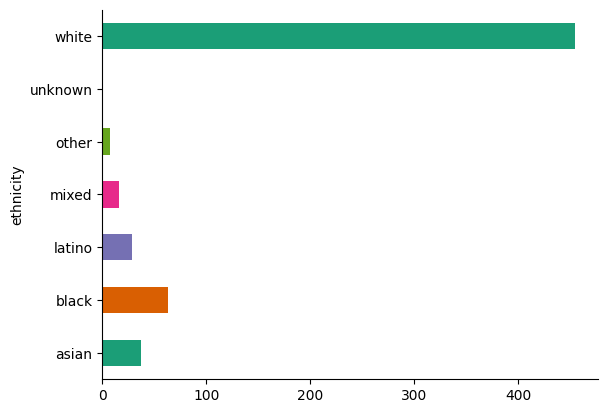

In [ ]:
# @title ethnicity

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ethnicity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **DISPLAYING COLUMNS**

In [ ]:
print(df.columns)



Index(['byols_embeddings', 'diabetes', 'gender', 'age', 'bmi', 'ethnicity',
       'ADA_score'],
      dtype='object')


# DISPLAYING COMMON ROWS

In [ ]:
print(df.iloc[0])


byols_embeddings    [4.6455812, 2.353643, 1.4512484, 2.015221, 4.9...
diabetes                                                            1
gender                                                              0
age                                                              56.0
bmi                                                         42.189433
ethnicity                                                      latino
ADA_score                                                           6
Name: 0, dtype: object


In [ ]:
import numpy as np # Import numpy for vstack

def extract_embedding(row):
    try:
        # Attempt to access the embedding, return if successful
        embedding_data = row['byols_embeddings']
        # Check if it's a dictionary and has the 'embedding' key
        if isinstance(embedding_data, dict) and 'embedding' in embedding_data:
            return embedding_data['embedding']
        else:
            # If not a dictionary or key is missing, handle appropriately
            # This could involve checking for other expected formats
            # or returning NaN if unexpected data is encountered
            return np.nan
    except (KeyError, TypeError):
        # Handle cases where 'byols_embeddings' is missing or invalid
        return np.nan # Return NaN for rows with missing or invalid data

# Get a list of embeddings, filtering out NaN values
embeddings = [emb for emb in df.apply(extract_embedding, axis=1) if not pd.isnull(emb)]

# Check if any embeddings were found
if embeddings:
    X = np.vstack(embeddings) # Only call vstack if embeddings is not empty
else:
    print("No valid embeddings found in the DataFrame.") # Handle the case where no embeddings are found
    X = np.array([]) # Assign an empty array to X if no embeddings were found


No valid embeddings found in the DataFrame.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Use correct column names
X = np.vstack(df['byols_embeddings'].values)     # Voice embeddings
y = df['diabetes'].values.astype(int)            # 0 = Non-diabetic, 1 = Diabetic

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **FINDING THE ACCURACY FROM VOICE DATASET**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        66
           1       0.56      0.62      0.59        56

    accuracy                           0.61       122
   macro avg       0.61      0.61      0.61       122
weighted avg       0.61      0.61      0.61       122



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 2. Predict on test set
y_pred = model.predict(X_test)

# 3. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6065573770491803
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        66
           1       0.56      0.62      0.59        56

    accuracy                           0.61       122
   macro avg       0.61      0.61      0.61       122
weighted avg       0.61      0.61      0.61       122



# **MAKING CONFUSION MATRIX**

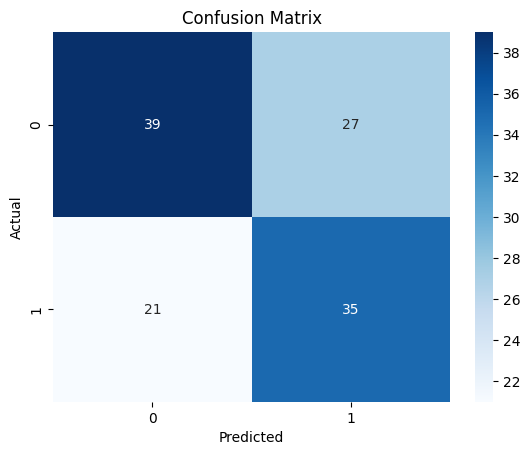

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(model, 'diabetes_voice_model.pkl')


['diabetes_voice_model.pkl']

In [ ]:
loaded_model = joblib.load('diabetes_voice_model.pkl')




In [ ]:
predictions = loaded_model.predict(X_test)


In [ ]:
joblib.dump(model, 'diabetes_voice_model.pkl')


['diabetes_voice_model.pkl']

In [ ]:
!ls


diabetes_voice_model.pkl  sample_data  Voice-and-diabetes-VOCADIAB


In [ ]:
# Load the saved model
loaded_model = joblib.load('diabetes_voice_model.pkl')

# Now you can use it for predictions
predictions = loaded_model.predict(X_test)


In [ ]:
!pip install transformers
!pip install soundfile
!pip install torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torch
import soundfile as sf

# Load Pretrained Wav2Vec2 model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

# Function to convert audio file to text
def transcribe_audio(audio_file):
    # Load audio file
    audio_input, _ = sf.read(audio_file)

    # Preprocess audio
    inputs = processor(audio_input, return_tensors="pt", sampling_rate=16000)

    # Make predictions
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted_ids = torch.argmax(logits, dim=-1)

    # Decode the predicted ids to text
    transcription = processor.decode(predicted_ids[0])
    return transcription


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **INSTALLING NECESSARY METRICS FOR THE PROJECT**

In [ ]:
!pip install librosa soundfile speechrecognition pydub nltk scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 38.1 MB/s eta 0:00:00


In [ ]:
!pip install gTTS pydub

from gtts import gTTS
from pydub import AudioSegment

# Step 1: Define a sample sentence
text = "Hello, I want help with my bill. The charges seem wrong."

# Step 2: Convert text to speech
tts = gTTS(text=text, lang='en')
tts.save("customer_query.mp3")

# Step 3: Load and confirm the audio file is created
audio = AudioSegment.from_mp3("customer_query.mp3")
print("MP3 file created successfully.")

MP3 file created successfully.


In [ ]:
from pydub import AudioSegment
import speech_recognition as sr

# Convert MP3 to WAV
audio = AudioSegment.from_mp3("customer_query.mp3")
audio.export("customer_query.wav", format="wav")

# Speech to Text
recognizer = sr.Recognizer()
with sr.AudioFile("customer_query.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Customer Said:", text)

Customer Said: hello I want help with my bill the charges seemed wrong


In [ ]:
import speech_recognition as sr

# Convert MP3 to WAV
audio.export("customer_query.wav", format="wav")

# Transcribe using SpeechRecognition
recognizer = sr.Recognizer()
with sr.AudioFile("customer_query.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Transcribed Text:", text)

Transcribed Text: hello I want help with my bill the charges seemed wrong


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('punkt')
nltk.download('stopwords')

# Sample training data
queries = [
    "I want to pay my bill",
    "Why is my internet not working",
    "Can I speak to an agent",
    "I need help with account settings",
    "What is my current plan"
]

labels = ["billing", "technical", "general", "account", "general"]

# Vectorize and train
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(queries)
model = MultinomialNB()
model.fit(X, labels)

# Predict category of user's query
X_input = vectorizer.transform([text])
predicted = model.predict(X_input)
print("Query Category:", predicted[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Query Category: general


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **VISUALIZATION  OF THE PROJECT**

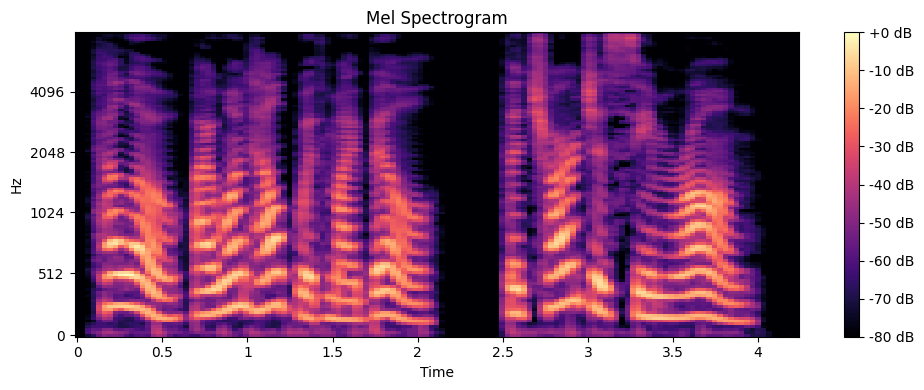

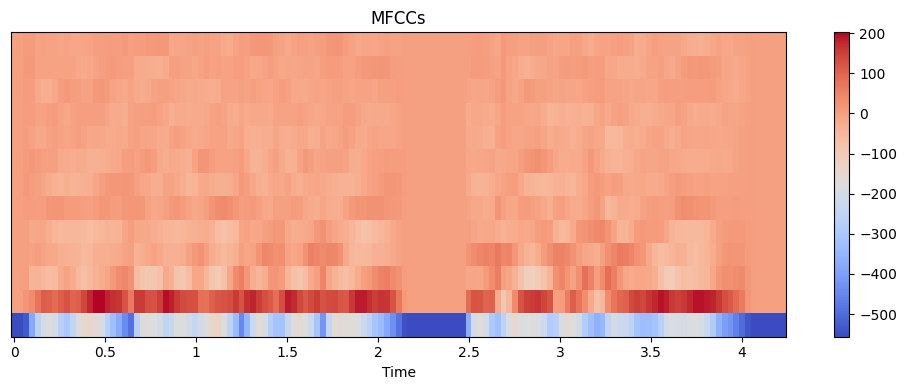

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the WAV file you already exported (or use the MP3 if needed)
y, sr = librosa.load("customer_query.wav", sr=16000)

# === Mel Spectrogram ===
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# === MFCC (Mel Frequency Cepstral Coefficients) ===
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

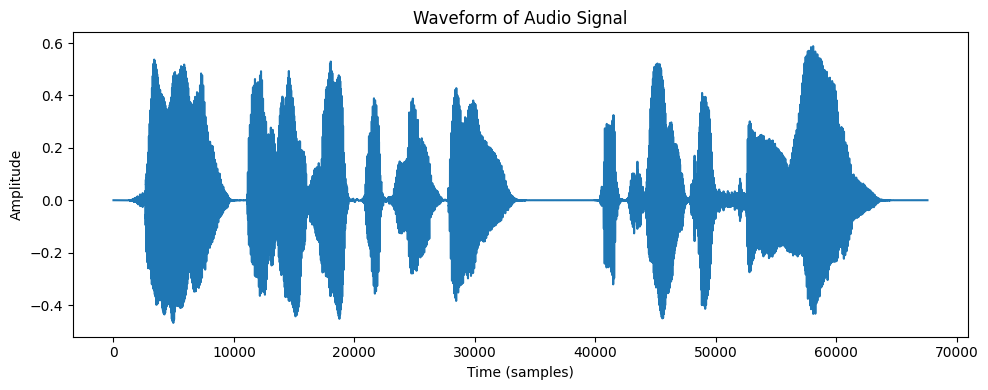

In [ ]:
# === Waveform ===
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


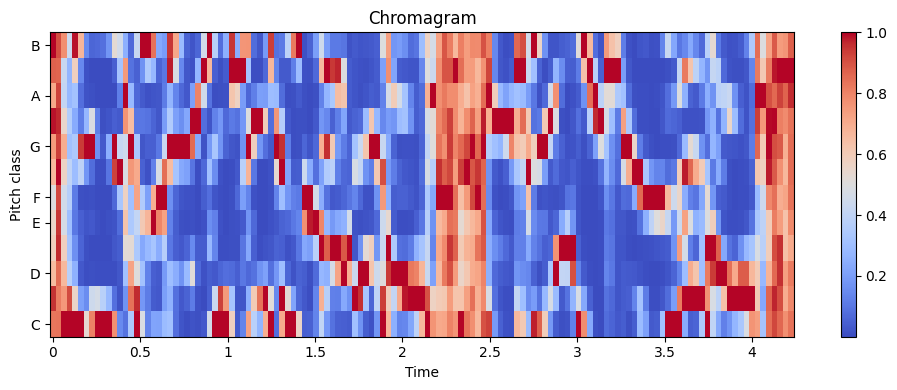

In [ ]:
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

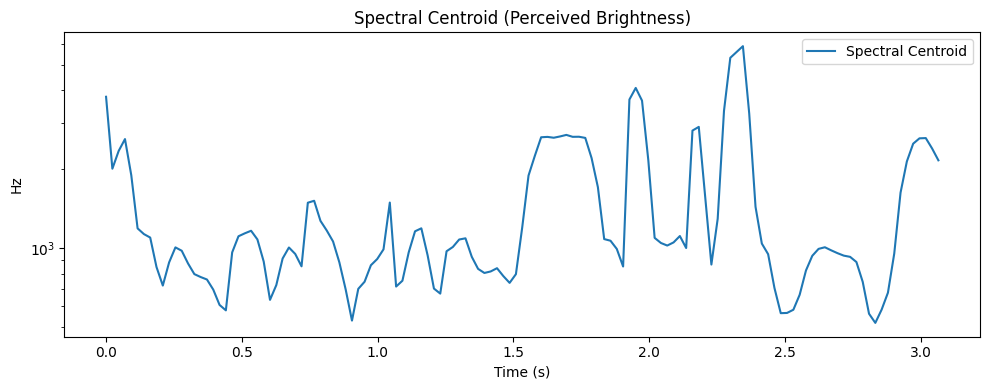

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(10, 4))
plt.semilogy(t, spectral_centroids, label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.title('Spectral Centroid (Perceived Brightness)')
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
!pip install librosa soundfile speechrecognition pydub nltk scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 27.1 MB/s eta 0:00:00


In [2]:
!pip install gTTS pydub

from gtts import gTTS
from pydub import AudioSegment

# Step 1: Define a sample sentence
text = "Hello, I want help with my bill. The charges seem wrong."

# Step 2: Convert text to speech
tts = gTTS(text=text, lang='en')
tts.save("customer_query.mp3")

# Step 3: Load and confirm the audio file is created
audio = AudioSegment.from_mp3("customer_query.mp3")
print("MP3 file created successfully.")

MP3 file created successfully.


In [3]:
from pydub import AudioSegment
import speech_recognition as sr

# Convert MP3 to WAV
audio = AudioSegment.from_mp3("customer_query.mp3")
audio.export("customer_query.wav", format="wav")

# Speech to Text
recognizer = sr.Recognizer()
with sr.AudioFile("customer_query.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Customer Said:", text)

Customer Said: hello I want help with my bill the charges seemed wrong


In [4]:
import speech_recognition as sr

# Convert MP3 to WAV
audio.export("customer_query.wav", format="wav")

# Transcribe using SpeechRecognition
recognizer = sr.Recognizer()
with sr.AudioFile("customer_query.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Transcribed Text:", text)

Transcribed Text: hello I want help with my bill the charges seemed wrong


In [5]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('punkt')
nltk.download('stopwords')

# Sample training data
queries = [
    "I want to pay my bill",
    "Why is my internet not working",
    "Can I speak to an agent",
    "I need help with account settings",
    "What is my current plan"
]

labels = ["billing", "technical", "general", "account", "general"]

# Vectorize and train
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(queries)
model = MultinomialNB()
model.fit(X, labels)

# Predict category of user's query
X_input = vectorizer.transform([text])
predicted = model.predict(X_input)
print("Query Category:", predicted[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Query Category: general


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


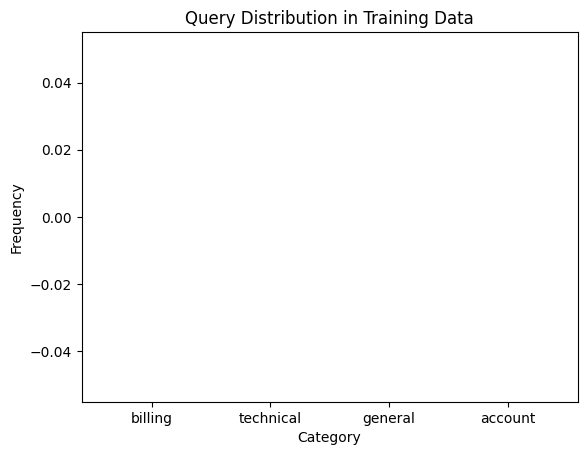

In [6]:
import matplotlib.pyplot as plt

categories = ["billing", "technical", "general", "account"]
counts = [queries.count(label) for label in categories]

plt.bar(categories, counts)
plt.title("Query Distribution in Training Data")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

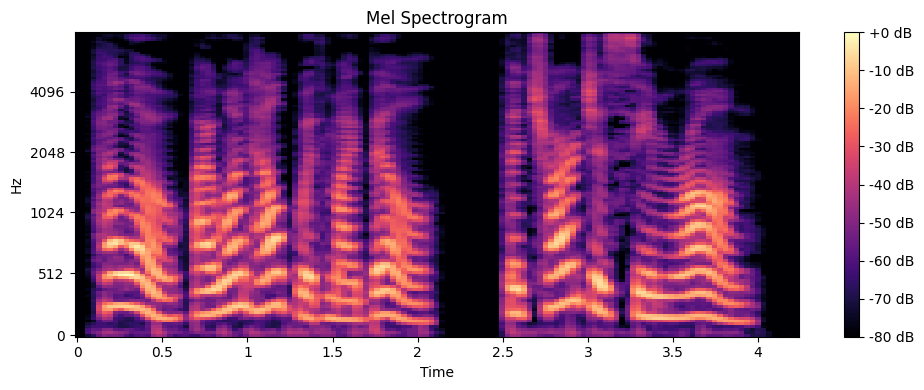

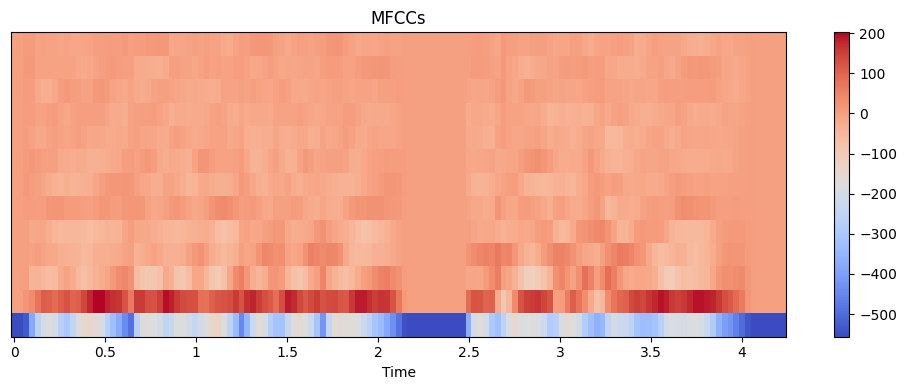

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the WAV file you already exported (or use the MP3 if needed)
y, sr = librosa.load("customer_query.wav", sr=16000)

# === Mel Spectrogram ===
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# === MFCC (Mel Frequency Cepstral Coefficients) ===
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.tight_layout()
plt.show()

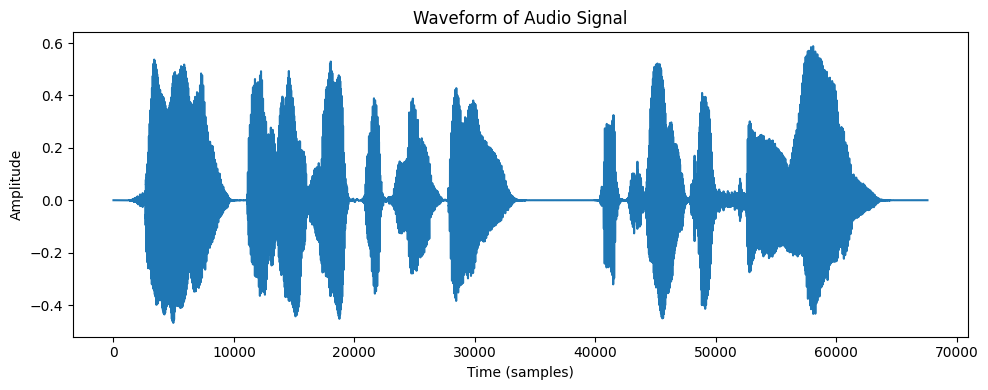

In [8]:
# === Waveform ===
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


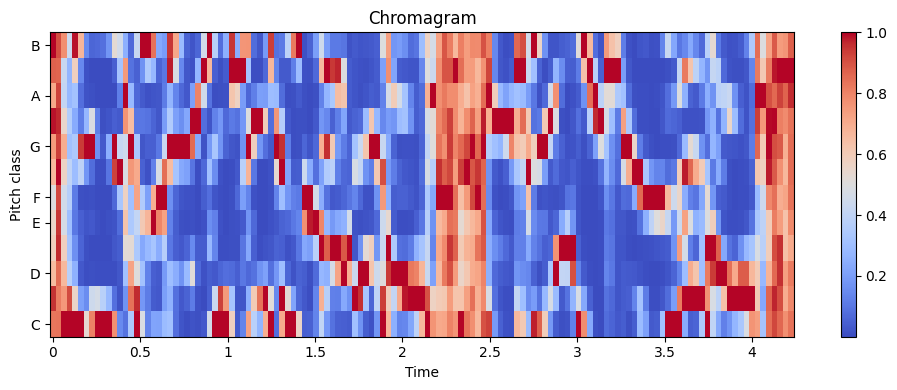

In [9]:
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm', sr=sr)
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

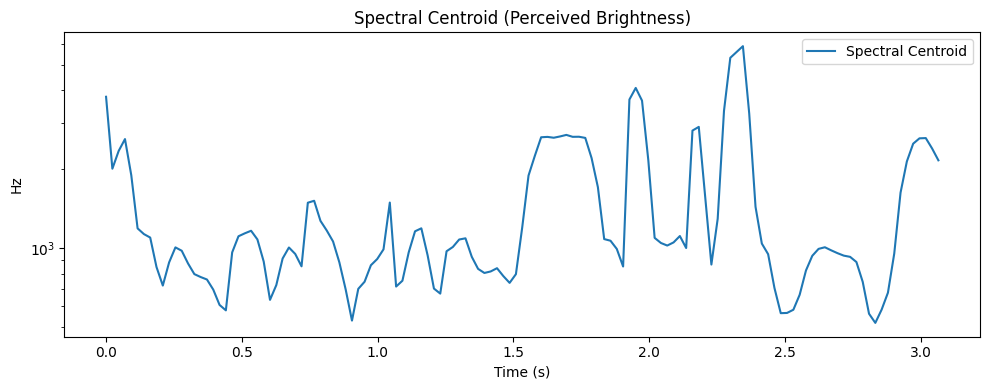

In [10]:
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(10, 4))
plt.semilogy(t, spectral_centroids, label='Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Hz')
plt.title('Spectral Centroid (Perceived Brightness)')
plt.legend()
plt.tight_layout()
plt.show()